# Partial Differential Equations 

In our study of numerical methods, we start with the Euler equations. By investigating the mathematical form of these equations, we seek to simplify the Euler equations to arrive at a simplistic model equation we can start using to study the behavior of various numerical methods. 

What do we mean by investigating the mathematical form of the Euler equations? 

   - From the study of partial differential equations, we know that we can classify a partial differential equation according to its **order**, wether it is **linear** or **non-linear**, homogeneous or non-homogeneous, and by its type, wether it is **hyperbolic**, **parabolic**, or **elliptic**.

Suppose we have a second-order, partial differential equation with the following form:

$$
a(x,t) \frac{\partial^2 u}{\partial x^2} + b(x,t) \frac{\partial^2 u}{\partial x\partial t} +
    c(x,t) \frac{\partial^2 u}{\partial t^2} + d(x,t) \frac{\partial u}{\partial x} +
    e(x,t) \frac{\partial u}{\partial t} + f(x,t) u = g(x,t)
$$  

The above partial differential equations is:

   - **elliptic** if $b^2 - 4ac < 0$
   - **parabolic** if $b^2 - 4ac = 0$
   - **hyperbolic** if $b^2 - 4ac > 0$


A full study of PDEs is beyond the scope of this course. What is important to know is that the characteristics of the PDE heavily influences our choice and construction of the numerical methods we use to find solutions to the PDE. 

**The goal is therefore to find a "model" PDE for the Euler equations with similar type and order that we can use to begin our study of numerical methods.** The hope is to find a model equation that is simplier, but still representative of the Euler equations. 
    

## Euler Equations

Before introducing a model equation for the Euler equations, let us review when the Euler equations are a good representation of a gas flow. The end goal is still to develop a model equation for the Euler equations, but since this set of equations is a simplification of the Navier-Stokes equations, we should know what terms we are ignoring in Euler equations. This is easily done by non-dimensionalizing the Navier-Stokes equations,

$$
\begin{align}
\textrm{Length} & : x^* = \frac{x}{L}  \\ \\
\textrm{Time} & : t^* = \frac{t U_0}{L} \\ \\
\textrm{Velocity} & : u^* = \frac{u}{U_0} \\ \\
\textrm{Pressure} & : p^* = \frac{p}{p_0} \\ \\
\textrm{Spatial derivative} & : \frac{\partial}{\partial x} = \frac{1}{L} \frac{\partial}{\partial x^*} \\ \\
\textrm{Time derivative} & : \frac{\partial}{\partial t} = \frac{U_0}{L} \frac{\partial}{\partial t^*}
\end{align}
$$

Using these definitions, substitute them into the incompressible form of the Navier-Stokes equations:

$$
\begin{align}
& \frac{U_0}{L} \left( \frac{\partial u^*}{\partial x^*} + \frac{\partial v^*}{\partial y^*}  + \frac{\partial w^*}{\partial z^*} \right) = 0 \\
&\frac{U_0^2}{L} \frac{\partial u^*} {\partial t^*} + \frac{U_0^2}{L} \left(u^* \frac{\partial u^*}{\partial x^*} +
                                                                           v^* \frac{\partial u^*}{\partial y^*} +
                                                                           w^* \frac{\partial u^*}{\partial z^*} \right) = -\frac{p_0}{\rho U_0^2} \frac{\partial p^*}{\partial x^*} + \frac{\nu}{U_0 L} \left( \frac{\partial^2 u^*}{\partial x^{*2}}  +  \frac{\partial^2 v^*}{\partial y^{*2}} +  \frac{\partial^2 w^*}{\partial z^{*2}} \right)
\end{align}
$$

Removing the $()^*$ notation and reverting back to the vector form, we get

$$
\begin{align}
& \nabla \cdot \mathbf{u} = 0 \\
& \frac{\partial \mathbf{u}} {\partial t} + \mathbf{u} \cdot \nabla \mathbf{u} = -\frac{p_0}{\rho U_0^2} \nabla p + \frac{\nu}{U_0 L} \nabla^2 \mathbf{u}
\end{align}
$$

From inspection, we can see that a convenient definition for the pressure scale would be to use $p_0 = \rho U_0^2$. Also, the non-dimensional term in front of the viscous term is defined as the Reynolds number, 

$$
\textrm{Re} = \frac{\textrm{inertial forces}}{\textrm{viscous forces}} = \frac{ U_0^2 / L }{ \nu U_0 / L^2 } = \frac{U_0 L}{\nu}
$$


The non-dimensional form of the incompressible Navier-Stokes equations is 

$$
\begin{align}
& \frac{\partial \mathbf{u}} {\partial t} + \mathbf{u} \cdot \nabla \mathbf{u} = -\nabla p + \frac{1}{\textrm{Re}} \nabla^2 \mathbf{u}
\end{align}
$$




Defining the **material derivative** as

$$
\begin{align}
\frac{\textrm{D}\mathbf{u}}{\textrm{D} t} & = \frac{\partial \mathbf{u}}{\partial t} + \mathbf{u} \cdot \nabla \mathbf{u} \\
\textrm{Lagrangian Acceleration} & = \textrm{Eulerian Acceleration} + \textrm{Convective Acceleration}
\end{align}
$$

WE can write the Euler equations as a set of partial differential equations describing the conservation of mass, momentum, and energy:

$$
\begin{align}
\textrm{mass} & : \frac{\textrm{D} \rho}{\textrm{D} t} = -\rho \nabla \cdot \mathbf{u} \\
\textrm{momentum} & :\frac{\textrm{D} \mathbf{u}}{\textrm{D} t} = -\frac{\nabla \mathbf{p}}{\rho} \\
\textrm{energy} & : \frac{\textrm{D} e}{\textrm{D} t} = -\frac{p}{\rho} \nabla \cdot \mathbf{u}
\end{align}
$$

and we see that in the limit that the Reynolds number goes to infinity, the Navier-Stokes equations simplify to the Euler equations. When the Reynolds number is large, we the affect of the viscous terms to be contained to a small region of the flow near the walls, e.g., the  boundary layer. 

We should observe that each PDE in this set of conservation equation is similar. Let's focus on the momentum equation, which we can write as:

$$
\frac{\textrm{D} \mathbf{u}}{\textrm{D} t} = \frac{\partial \mathbf{u}}{\partial t} + \mathbf{u} \cdot \nabla \mathbf{u} = -\frac{\nabla \mathbf{p}}{\rho} 
$$

In one-dimensional where the velocity vector, $\mathbf{u}(\mathbf{x},t) = u(x,t)$, we have

$$
\frac{\partial u}{\partial t} + u \frac{\partial u }{\partial x} = -\frac{\nabla \mathbf{p}}{\rho} 
$$

where the x-velocity, $u$, is a function of the time, $t$, and the Cartesian coordinate, $x$. If we assume the pressure gradient is zero (*not the best assumption, but useful*), then we get the non-linear PDE,

$$
\frac{\partial u}{\partial t} + u \frac{\partial u }{\partial x} = 0
$$

To generalize this PDE, let us write the following

$$
\frac{\partial u}{\partial t} + c(u) \frac{\partial u }{\partial x} = 0
$$

where we have assume the coefficient, $c$ is a function of the variable $u$. Note that at this point, the variable $u(x,t)$ does not necessarily need to represent the velocity. Both the mass and energy conservation equations can be simplified in a similar manner. We previously stated that we can classify a PDE as **hyperbolic**, **parabolic**, or **elliptic**. The PDE described above is a non-linear, hyperbolic PDE. It is non-linear because the coefficient, $c$, is a function of $u$. Let us simplify this even further and assume that $c$ is constant. 


    
## Hyperbolic model equation

If $c$ is constant, and let us assume $c > 0$, the we arrive at the model hyperbolic PDE. This equation is often referred to as the linear convection (or advection) PDE,

$$
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
$$

In order to find a solution to this PDE, we must define the initial condition for $u(x,t)$ at $t=t_0$ as well as the boundary condition at $x=0$. Let the initial condition be defined as

$$
u(x,t_0) = g(x)
$$

and the boundary condition at $x=0$, 

$$
u(0,t) = u_0
$$

There is an exact solution to this PDE, which can be found using the method of characteristics. If $c > 0$, then we only need the boundary condition at $x=0$. *(Note that if $c < 0$, then we need the boundary condition at $x=L$.)* Note that the boundary condition is informed by the initial condition; as a result, we often call solutions to linear convection PDE as solutions to the initial value problem. 

The method of characteristics can be used to find an analytical solution to the 
above equation. Along a characteristic line, we have

$$
\frac{\textrm{d}x}{\textrm{d} t} = c.
$$

As a result, along a particular curve $x = x(t)$, we have

$$
\frac{\textrm{d}}{\textrm{d} t}\Big[u(x(t),t)\Big] = \frac{\partial u}{\partial t} + \frac{\textrm{d} x}{\textrm{d} t} \frac{\partial u}{\partial x}
 =  \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} . 
$$

The value $u$ is therefore constant along the characteristics (the material derivative $du/dt$ is zero, thus u is constant along lines $x-t$ lines).
We also know that these characteristic lines are straight, since the curvature (second-derivative) of the characteristics is zero,

$$
\frac{\textrm{d}^2 x}{\textrm{d}t^2} = \frac{\textrm{d}}{\textrm{d}t}\left(\frac{\textrm{d} x}{\textrm{d}t}\right) = \frac{\textrm{d}c}{\textrm{d}t} = 0
$$

Knowing that the value of $u$ is constant along a characteristic, we can define a series of parametric lines that only depend on the
initial value of $u$ at a point emanating from  $(\eta,0)$. Direct integration of

$$
\frac{\textrm{d}x}{\textrm{d} t} = c.
$$

results in the characteristic line
$$
x = c t + \xi
$$

or 

$$
\xi= x - c t
$$

where the solution of $u(x,t)$ of the initial value problem is given by the 

$$
u(x,t) = u(\xi, 0) = u_0(\xi) = u_0(x - ct)
$$

The exact solution is

$$
u(x,t) = g(x - c(t - t_0))
$$

## Analytical Solutions to the Linear Convection PDE

Let us assume, $c = 1$, with an initial condition given by the Gaussian distribution, 

$$
u(x,0) = g(x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

where $\sigma$ is the standard deviation, and $\mu$ is the mean. The boundary condition is provided by the initial condition, 

$$
u(0,t) = g(0)
$$

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
def gaussian(x, mu, sigma):
    '''
    Return a Gaussian distribution.
    
    Args:
        x (np.array) : Values of x
        mu (float) : Mean
        sigma (float) : Standard deviation
    Returns:
        f (np.array) : Gaussian distribution as a function of x
    '''
    f = np.zeros_like(x)
    for i in range(len(x)):
        f[i] = 1.0 / sigma / np.sqrt(2.0 * np.pi) * np.exp(- (x[i] - mu)**2 / 2 / sigma**2)
    return f

In [ ]:
# Define the mean and standard deviation of the distribution
mean = 0.0
std = 0.1

# Create a mesh of 100 points
x = np.linspace(-1.0,1.0, 100)

# Define the initial condition
u0 = gaussian(x, mean, std)

c = 1.0 # Wave speed
t = 0.5 # Time

# Compute the solution at t = 0.5
un = gaussian(x - c * t, mean, std)

(-1, 1)

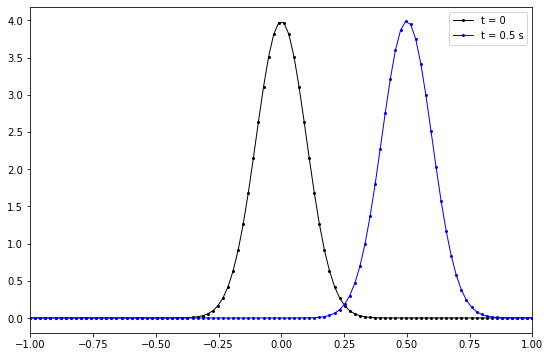

In [12]:
# Plot the solution

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

line = ax.plot(x, u0, lw=1, c='k', marker='o', ms=2, label=r't = 0')
line = ax.plot(x, un, lw=1, c='b', marker='o', ms=2, label=r't = 0.5 s')

ax.legend()
ax.set_xlim((-1,1))